# Function to automatic merge and fill missing values
This quest is following the quest "Pandas merge and fill missing values"


## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them).

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
def merge_and_fill(df_main, df_opinion):
  NewDataFrame= pd.merge(df_main, 
         df_opinion, 
         how='left', 
         left_on='DATE',
         right_on='date')
  median = NewDataFrame['WEATHER_CODE_EVENING'].median() 
  NewDataFrame['WEATHER_CODE_EVENING'].fillna(median, inplace=True)
  median = NewDataFrame['TOTAL_SNOW_MM'].median() 
  NewDataFrame['TOTAL_SNOW_MM'].fillna(NewDataFrame['TOTAL_SNOW_MM'].median(), inplace=True)
  median = NewDataFrame['UV_INDEX'].median() 
  NewDataFrame['UV_INDEX'].fillna(NewDataFrame['UV_INDEX'].median(), inplace=True)
  median = NewDataFrame['SUNHOUR'].median() 
  NewDataFrame['SUNHOUR'].fillna(NewDataFrame['SUNHOUR'].median(), inplace=True)
  NewDataFrame['OPINION'].fillna('Unknown', inplace=True)

  return NewDataFrame
NewDataFrame=merge_and_fill(df_main, df_opinion)
NewDataFrame.drop('date', axis=1, inplace=True)
NewDataFrame.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
#solution de cyril 
#from termcolor import colored
#log = lambda x,y="": print(colored(x, 'white', 'on_cyan', attrs=['bold']), y)

#def merge_and_fill(dfMain, dfOpinion, fieldToMergeOn):
#  df = pd.merge(dfMain, dfOpinion, how="left", on=[fieldToMergeOn])
  # WEATHER_CODE_EVENING
 # df["WEATHER_CODE_EVENING"].fillna(df["WEATHER_CODE_EVENING"].median(), inplace = True) 
  # TOTAL_SNOW_MM
 # df["TOTAL_SNOW_MM"].fillna(0, inplace = True) 
  # UV_INDEX
 # df["UV_INDEX"].fillna(df["UV_INDEX"].median(), inplace = True) 
  # SUNHOUR
 # df["SUNHOUR"].fillna(method="ffill", inplace = True) 
  # OPINION
  #df["OPINION"].fillna("unknown", inplace = True) 

 # return df

#df_opinion.rename(columns={'date': 'DATE'}, inplace=True)
#df = merge_and_fill(df_main, df_opinion, "DATE")
#print(df.info())
#log("nan row count after merge_and_fill:", len(df[df.isnull().any(axis=1)].index))


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [ ]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv
df_weather=pd.DataFrame()
for year in range(2010, 2019):
  df_main=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_{}.csv".format(year))
  df_opinion=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_{}.csv".format(year))
  test=merge_and_fill(df_main, df_opinion)
  df_weather=pd.concat([df_weather, test], ignore_index=True)



In [ ]:
print( df_weather)

            DATE  MAX_TEMPERATURE_C  ...  SUNHOUR   OPINION
0     2010-01-01                  5  ...      5.1  very bad
1     2010-01-02                  5  ...      8.7  very bad
2     2010-01-03                  5  ...      6.9  very bad
3     2010-01-04                  1  ...      8.7  very bad
4     2010-01-05                  2  ...      8.7  very bad
...          ...                ...  ...      ...       ...
3282  2018-12-27                  7  ...      8.7  very bad
3283  2018-12-28                  7  ...      8.7  very bad
3284  2018-12-29                  7  ...      8.7  very bad
3285  2018-12-30                  9  ...      3.3  very bad
3286  2018-12-31                  9  ...      8.7  very bad

[3287 rows x 21 columns]


## Add 2019

In [ ]:
link2019 =pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv")


In [ ]:

df_weather = pd.concat([df_weather,link2019], ignore_index = True)
df_weather.drop('date', axis=1, inplace=True)
df_weather



,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,MONTH,DAY
0,2010-01-01 00:00:00,5,2,19,2,5,3,0.0,86,10.000,1012,62.875,5,3,-1,119.0,0.0,1.0,5.1,very bad,NaN,NaN,NaN,NaN
1,2010-01-02 00:00:00,5,-1,6,-1,4,1,0.0,78,10.000,1022,31.375,5,0,2,116.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
2,2010-01-03 00:00:00,5,1,26,2,4,2,0.3,61,9.875,1021,65.500,5,0,-3,119.0,0.0,1.0,6.9,very bad,NaN,NaN,NaN,NaN
3,2010-01-04 00:00:00,1,-4,25,-2,0,-3,0.0,75,10.000,1017,9.875,1,0,-9,113.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
4,2010-01-05 00:00:00,2,-5,20,-5,1,-4,0.0,71,10.000,1012,8.000,3,0,-10,113.0,0.0,1.0,8.7,very bad,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,1033,57.625,13,10,8,116.0,0.0,1.0,8.7,not good not bad,119.0,143.0,12.0,27.0
5108,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,1035,39.500,11,9,4,116.0,0.0,1.0,6.9,very bad,143.0,116.0,12.0,28.0
5109,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,1034,4.000,9,4,0,116.0,0.0,1.0,8.7,very bad,116.0,116.0,12.0,29.0
5110,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,1033,1.875,12,4,4,113.0,0.0,1.0,8.7,very bad,113.0,113.0,12.0,30.0


# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 10 seasonality for the 10 summers/winters alternance.


In [ ]:
df_weather['DATE']=pd.to_datetime(df_weather['DATE'])

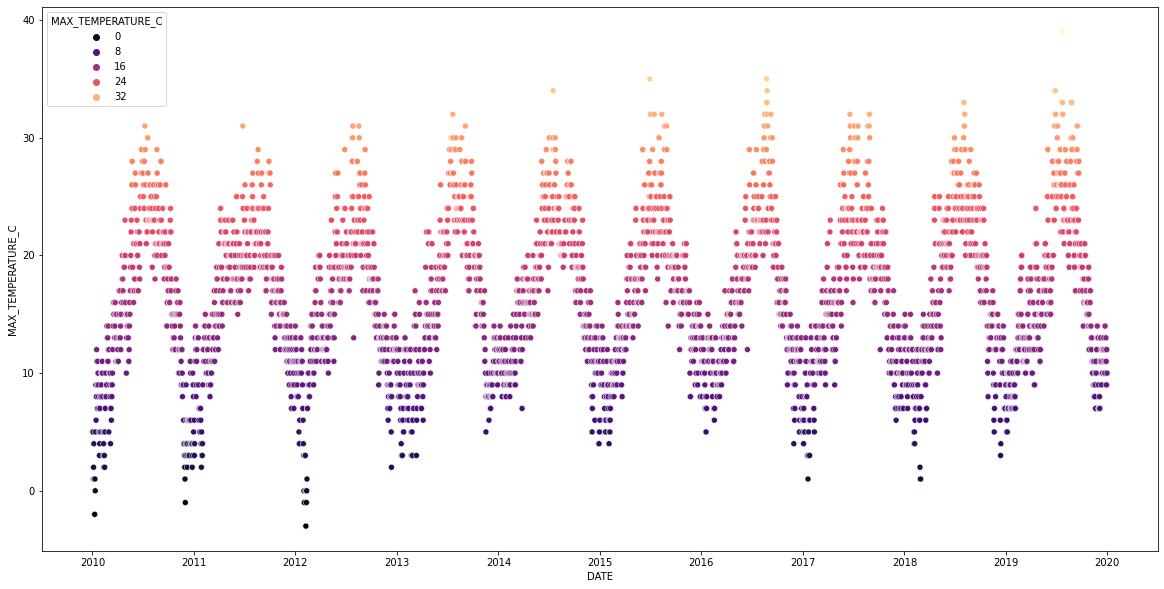

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_weather, x='DATE', y='MAX_TEMPERATURE_C', hue = 'MAX_TEMPERATURE_C', palette= "magma",)
